In [3]:
from google.colab import files
uploaded = files.upload()




Saving FakeNews_Cleaned_Sample.csv to FakeNews_Cleaned_Sample.csv


In [4]:
import os
print(os.listdir())


['.config', 'FakeNews_Cleaned_Sample.csv', 'sample_data']


In [5]:
df = pd.read_csv("FakeNews_Cleaned_Sample.csv")
print("Dataset loaded successfully ✅")
df.head()


Dataset loaded successfully ✅


,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


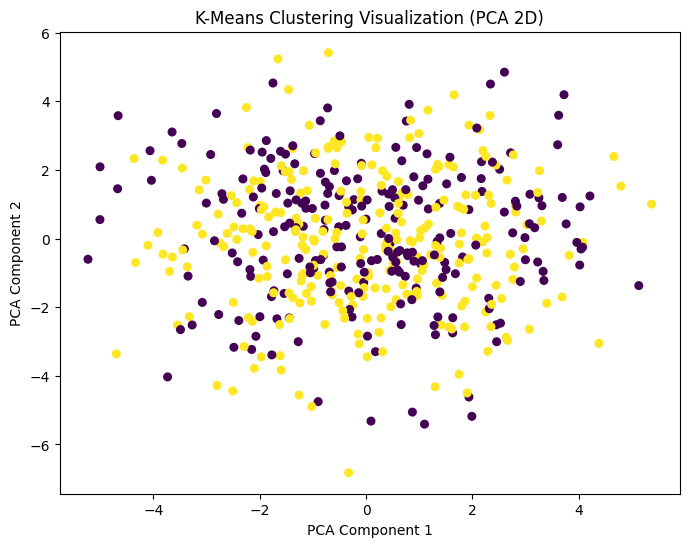

  label  cluster
0  real        1
1  fake        1
2  fake        1
3  fake        1
4  fake        1
5  real        0
6  fake        1
7  fake        1
8  fake        0
9  real        0


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("FakeNews_Cleaned_Sample.csv")

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['text']).toarray()

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=df['cluster'], cmap='viridis', s=30)
plt.title('K-Means Clustering Visualization (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

print(df[['label','cluster']].head(10))


### Reflection
The K-Means clustering model was able to group articles into two clusters without using any labels.
After comparing clusters with actual labels, Cluster 1 was found to contain mostly fake news articles,
while Cluster 0 had a mix of real and fake articles. This shows that the text features (captured using TF-IDF)
can reveal hidden patterns between fake and real news.
Using PCA for visualization helped confirm that the clusters are somewhat separable in a 2D space.
